In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np 
from tqdm import tqdm
import pandas as pd 
warnings.filterwarnings('ignore')

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_csv('C:/Users/MSI GF63/Desktop/SUPCOM/3emeannée/tuto/Data_Tuto_2013_2017.csv')
df.head()

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,...,Special Education Services,Other Developmental Disability,Drug Substance Disorder,Pulmonary Asthma,Other Chronic Med Condition,No Chronic Med Condition,Unknown Chronic Med Condition,Received Smoking Medication,Received Smoking Counseling,Three Digit Residence Zip Code
0,2013,SUPPORT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,OUTPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",OTHER,PRIVATE RESIDENCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,OUTPATIENT,WESTERN REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,PRIVATE RESIDENCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,OUTPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,OUTPATIENT,CENTRAL NY REGION,CHILD,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns


Index(['Survey Year', 'Program Category', 'Region Served', 'Age Group', 'Sex',
       'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
       'Living Situation', 'Household Composition', 'Primary Language',
       'Veteran Status', 'Employment Status',
       'Number of Hours Worked Each Week', 'Educational Status',
       'Special Educational Services', 'Mental Illness',
       'Intellectual Disability', 'Autism Spectrum',
       'Other Developmental Disabilities', 'Alcohol Related Disorder',
       'Drug Substance Related Disorder', 'Mobility Impairment Disorder',
       'Hearing Visual Impairment', 'Hyperlipidemia', 'High Blood Pressure',
       'Diabetes', 'Obesity', 'Heart Attack', 'Stroke', 'Other Cardiac',
       'Pulmonary/Asthma', 'Alzheimer or Dementia', 'Kidney Disease',
       'Liver Disease', 'Endocrine Condition', 'Neurological Condition',
       'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
       'No Chronic Med. Condition', 'Unknown Chronic Med

In [4]:
useful_clumns=['Age Group','Sex','Hispanic Ethnicity','Race','Living Situation','Household Composition','Veteran Status','Employment Status','Number of Hours Worked Each Week','Autism Spectrum','Other Developmental Disabilities','Alcohol Related Disorder','Drug Substance Related Disorder','Mobility Impairment Disorder','Hearing Visual Impairment','Hyperlipidemia','High Blood Pressure','Diabetes','Obesity','Heart Attack','Serious Mental Illness','Smokes','Liver Disease','Kidney Disease','Alzheimer or Dementia','Pulmonary/Asthma','Cancer','Stroke']

df=df.loc[:,useful_clumns]

In [5]:
df

,Age Group,Sex,Hispanic Ethnicity,Race,Living Situation,Household Composition,Veteran Status,Employment Status,Number of Hours Worked Each Week,Autism Spectrum,...,Obesity,Heart Attack,Serious Mental Illness,Smokes,Liver Disease,Kidney Disease,Alzheimer or Dementia,Pulmonary/Asthma,Cancer,Stroke
0,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,UNKNOWN,NO,UNKNOWN EMPLOYMENT STATUS,NOT APPLICABLE,UNKNOWN,...,UNKNOWN,UNKNOWN,YES,NO,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
1,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",OTHER,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,EMPLOYED,35 HOURS OR MORE,NO,...,YES,NO,YES,NO,NO,NO,NO,NO,NO,NO
2,ADULT,MALE,"NO, NOT HISPANIC/LATINO",BLACK ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,"UNEMPLOYED, LOOKING FOR WORK",NOT APPLICABLE,NO,...,NO,NO,NO,UNKNOWN,NO,NO,NO,NO,NO,NO
3,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,NO,...,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO
4,CHILD,MALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,NO,...,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367391,ADULT,MALE,"YES, HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NaN,NO,...,NO,NO,YES,YES,NO,NO,NO,NaN,NO,NO
367392,ADULT,MALE,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NaN,NO,...,YES,NO,YES,YES,NO,NO,NO,NaN,NO,NO
367393,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NaN,NO,...,NO,NO,YES,YES,NO,NO,NO,NaN,NO,NO
367394,ADULT,FEMALE,"YES, HISPANIC/LATINO",MULTI-RACIAL,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NaN,NO,...,YES,NO,YES,NO,NO,NO,NO,NaN,NO,NO


In [6]:
df.head()

,Age Group,Sex,Hispanic Ethnicity,Race,Living Situation,Household Composition,Veteran Status,Employment Status,Number of Hours Worked Each Week,Autism Spectrum,...,Obesity,Heart Attack,Serious Mental Illness,Smokes,Liver Disease,Kidney Disease,Alzheimer or Dementia,Pulmonary/Asthma,Cancer,Stroke
0,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,UNKNOWN,NO,UNKNOWN EMPLOYMENT STATUS,NOT APPLICABLE,UNKNOWN,...,UNKNOWN,UNKNOWN,YES,NO,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
1,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",OTHER,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,EMPLOYED,35 HOURS OR MORE,NO,...,YES,NO,YES,NO,NO,NO,NO,NO,NO,NO
2,ADULT,MALE,"NO, NOT HISPANIC/LATINO",BLACK ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,"UNEMPLOYED, LOOKING FOR WORK",NOT APPLICABLE,NO,...,NO,NO,NO,UNKNOWN,NO,NO,NO,NO,NO,NO
3,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,NO,...,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO
4,CHILD,MALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,NO,...,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO


In [7]:
df.describe()

,Age Group,Sex,Hispanic Ethnicity,Race,Living Situation,Household Composition,Veteran Status,Employment Status,Number of Hours Worked Each Week,Autism Spectrum,...,Obesity,Heart Attack,Serious Mental Illness,Smokes,Liver Disease,Kidney Disease,Alzheimer or Dementia,Pulmonary/Asthma,Cancer,Stroke
count,367396,367396,367396,367396,367396,367396,367396,367396,180204,367396,...,367396,367396,367396,367396,367396,367396,367396,180204,367396,367396
unique,3,3,3,5,4,4,3,5,5,3,...,3,3,3,3,3,3,3,3,3,3
top,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,NO,...,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO
freq,292669,183354,273928,186026,283206,202899,347577,256165,155576,340911,...,271944,321422,317687,239540,317365,320371,323743,142027,317860,321520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367396 entries, 0 to 367395
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Age Group                         367396 non-null  object
 1   Sex                               367396 non-null  object
 2   Hispanic Ethnicity                367396 non-null  object
 3   Race                              367396 non-null  object
 4   Living Situation                  367396 non-null  object
 5   Household Composition             367396 non-null  object
 6   Veteran Status                    367396 non-null  object
 7   Employment Status                 367396 non-null  object
 8   Number of Hours Worked Each Week  180204 non-null  object
 9   Autism Spectrum                   367396 non-null  object
 10  Other Developmental Disabilities  180204 non-null  object
 11  Alcohol Related Disorder          367396 non-null  object
 12  Dr

In [9]:
df.isnull().sum()

Age Group                                0
Sex                                      0
Hispanic Ethnicity                       0
Race                                     0
Living Situation                         0
Household Composition                    0
Veteran Status                           0
Employment Status                        0
Number of Hours Worked Each Week    187192
Autism Spectrum                          0
Other Developmental Disabilities    187192
Alcohol Related Disorder                 0
Drug Substance Related Disorder     187192
Mobility Impairment Disorder             0
Hearing Visual Impairment                0
Hyperlipidemia                           0
High Blood Pressure                      0
Diabetes                                 0
Obesity                                  0
Heart Attack                             0
Serious Mental Illness                   0
Smokes                                   0
Liver Disease                            0
Kidney Dise

In [10]:
df=df.drop(['Pulmonary/Asthma', 'Drug Substance Related Disorder','Other Developmental Disabilities','Number of Hours Worked Each Week'], axis=1)

In [11]:
df.isnull().sum()

Age Group                       0
Sex                             0
Hispanic Ethnicity              0
Race                            0
Living Situation                0
Household Composition           0
Veteran Status                  0
Employment Status               0
Autism Spectrum                 0
Alcohol Related Disorder        0
Mobility Impairment Disorder    0
Hearing Visual Impairment       0
Hyperlipidemia                  0
High Blood Pressure             0
Diabetes                        0
Obesity                         0
Heart Attack                    0
Serious Mental Illness          0
Smokes                          0
Liver Disease                   0
Kidney Disease                  0
Alzheimer or Dementia           0
Cancer                          0
Stroke                          0
dtype: int64

In [12]:
for col in df:
  print(df[col].unique())
  print(df[col].value_counts())

['ADULT' 'CHILD' 'UNKNOWN']
ADULT      292669
CHILD       74658
UNKNOWN        69
Name: Age Group, dtype: int64
['FEMALE' 'MALE' 'UNKNOWN']
FEMALE     183354
MALE       180746
UNKNOWN      3296
Name: Sex, dtype: int64
['NO, NOT HISPANIC/LATINO' 'YES, HISPANIC/LATINO' 'UNKNOWN']
NO, NOT HISPANIC/LATINO    273928
YES, HISPANIC/LATINO        84630
UNKNOWN                      8838
Name: Hispanic Ethnicity, dtype: int64
['WHITE ONLY' 'OTHER' 'BLACK ONLY' 'UNKNOWN RACE' 'MULTI-RACIAL']
WHITE ONLY      186026
BLACK ONLY       95061
OTHER            63011
MULTI-RACIAL     12268
UNKNOWN RACE     11030
Name: Race, dtype: int64
['PRIVATE RESIDENCE' 'OTHER LIVING SITUATION' 'INSTITUTIONAL SETTING'
 'UNKNOWN']
PRIVATE RESIDENCE         283206
OTHER LIVING SITUATION     64120
UNKNOWN                    14305
INSTITUTIONAL SETTING       5765
Name: Living Situation, dtype: int64
['UNKNOWN' 'COHABITATES WITH OTHERS' 'LIVES ALONE' 'NOT APPLICABLE']
COHABITATES WITH OTHERS    202899
LIVES ALONE         

In [13]:
df

,Age Group,Sex,Hispanic Ethnicity,Race,Living Situation,Household Composition,Veteran Status,Employment Status,Autism Spectrum,Alcohol Related Disorder,...,Diabetes,Obesity,Heart Attack,Serious Mental Illness,Smokes,Liver Disease,Kidney Disease,Alzheimer or Dementia,Cancer,Stroke
0,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,UNKNOWN,NO,UNKNOWN EMPLOYMENT STATUS,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,YES,NO,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
1,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",OTHER,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,EMPLOYED,NO,NO,...,NO,YES,NO,YES,NO,NO,NO,NO,NO,NO
2,ADULT,MALE,"NO, NOT HISPANIC/LATINO",BLACK ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,"UNEMPLOYED, LOOKING FOR WORK",NO,NO,...,NO,NO,NO,NO,UNKNOWN,NO,NO,NO,NO,NO
3,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO
4,CHILD,MALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367391,ADULT,MALE,"YES, HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,YES,...,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO
367392,ADULT,MALE,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,YES,YES,NO,YES,YES,NO,NO,NO,NO,NO
367393,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO
367394,ADULT,FEMALE,"YES, HISPANIC/LATINO",MULTI-RACIAL,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,YES,YES,NO,YES,NO,NO,NO,NO,NO,NO


In [14]:
df.dropna()

,Age Group,Sex,Hispanic Ethnicity,Race,Living Situation,Household Composition,Veteran Status,Employment Status,Autism Spectrum,Alcohol Related Disorder,...,Diabetes,Obesity,Heart Attack,Serious Mental Illness,Smokes,Liver Disease,Kidney Disease,Alzheimer or Dementia,Cancer,Stroke
0,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,UNKNOWN,NO,UNKNOWN EMPLOYMENT STATUS,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,YES,NO,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
1,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",OTHER,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,EMPLOYED,NO,NO,...,NO,YES,NO,YES,NO,NO,NO,NO,NO,NO
2,ADULT,MALE,"NO, NOT HISPANIC/LATINO",BLACK ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,"UNEMPLOYED, LOOKING FOR WORK",NO,NO,...,NO,NO,NO,NO,UNKNOWN,NO,NO,NO,NO,NO
3,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO
4,CHILD,MALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367391,ADULT,MALE,"YES, HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,YES,...,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO
367392,ADULT,MALE,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,YES,YES,NO,YES,YES,NO,NO,NO,NO,NO
367393,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO
367394,ADULT,FEMALE,"YES, HISPANIC/LATINO",MULTI-RACIAL,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,YES,YES,NO,YES,NO,NO,NO,NO,NO,NO


In [15]:
df=df.replace({'UNKNOWN' : np.nan, 'UNKNOWN RACE' : np.nan})
df

,Age Group,Sex,Hispanic Ethnicity,Race,Living Situation,Household Composition,Veteran Status,Employment Status,Autism Spectrum,Alcohol Related Disorder,...,Diabetes,Obesity,Heart Attack,Serious Mental Illness,Smokes,Liver Disease,Kidney Disease,Alzheimer or Dementia,Cancer,Stroke
0,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,NaN,NO,UNKNOWN EMPLOYMENT STATUS,NaN,NaN,...,NaN,NaN,NaN,YES,NO,NaN,NaN,NaN,NaN,NaN
1,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",OTHER,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,EMPLOYED,NO,NO,...,NO,YES,NO,YES,NO,NO,NO,NO,NO,NO
2,ADULT,MALE,"NO, NOT HISPANIC/LATINO",BLACK ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,"UNEMPLOYED, LOOKING FOR WORK",NO,NO,...,NO,NO,NO,NO,NaN,NO,NO,NO,NO,NO
3,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO
4,CHILD,MALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367391,ADULT,MALE,"YES, HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,YES,...,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO
367392,ADULT,MALE,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,YES,YES,NO,YES,YES,NO,NO,NO,NO,NO
367393,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO
367394,ADULT,FEMALE,"YES, HISPANIC/LATINO",MULTI-RACIAL,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,YES,YES,NO,YES,NO,NO,NO,NO,NO,NO


In [16]:
df=df.dropna()

In [17]:
df

,Age Group,Sex,Hispanic Ethnicity,Race,Living Situation,Household Composition,Veteran Status,Employment Status,Autism Spectrum,Alcohol Related Disorder,...,Diabetes,Obesity,Heart Attack,Serious Mental Illness,Smokes,Liver Disease,Kidney Disease,Alzheimer or Dementia,Cancer,Stroke
1,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",OTHER,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,EMPLOYED,NO,NO,...,NO,YES,NO,YES,NO,NO,NO,NO,NO,NO
3,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO
4,CHILD,MALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO
5,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO
6,ADULT,MALE,"YES, HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,YES,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367391,ADULT,MALE,"YES, HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,YES,...,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO
367392,ADULT,MALE,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,YES,YES,NO,YES,YES,NO,NO,NO,NO,NO
367393,ADULT,FEMALE,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO
367394,ADULT,FEMALE,"YES, HISPANIC/LATINO",MULTI-RACIAL,OTHER LIVING SITUATION,NOT APPLICABLE,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NO,NO,...,YES,YES,NO,YES,NO,NO,NO,NO,NO,NO


data viz

In [18]:

# # statistics tools
# from statsmodels.graphics.mosaicplot import mosaic

# # plot target vs features using mosaic plot
# plt_para_save = plt.rcParams['figure.figsize'] # remember plot settings
b=df.columns.values.tolist()
b.remove('Stroke')
b
# for f in b:
#     plt.rcParams["figure.figsize"] = (10,5) # increase plot size for mosaics
#     mosaic(df, [f, 'Stroke'], title='Stroke vs ' + f)
#     plt.show()
    
# # reset plot size again
# plt.rcParams['figure.figsize'] = plt_para_save

['Age Group',
 'Sex',
 'Hispanic Ethnicity',
 'Race',
 'Living Situation',
 'Household Composition',
 'Veteran Status',
 'Employment Status',
 'Autism Spectrum',
 'Alcohol Related Disorder',
 'Mobility Impairment Disorder',
 'Hearing Visual Impairment',
 'Hyperlipidemia',
 'High Blood Pressure',
 'Diabetes',
 'Obesity',
 'Heart Attack',
 'Serious Mental Illness',
 'Smokes',
 'Liver Disease',
 'Kidney Disease',
 'Alzheimer or Dementia',
 'Cancer']

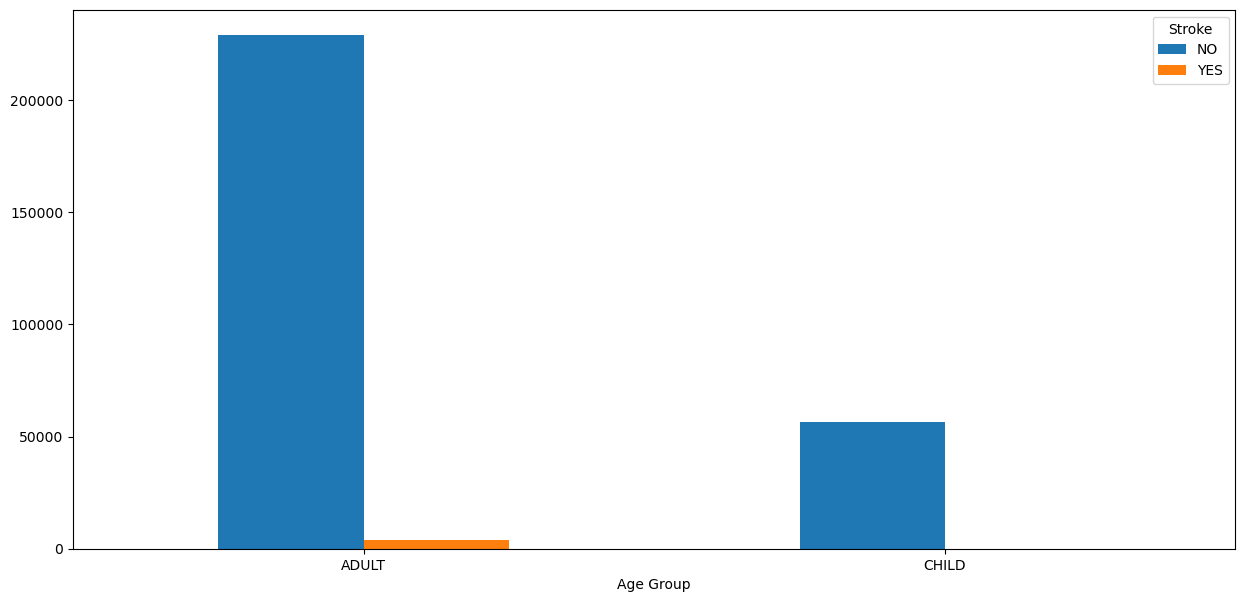

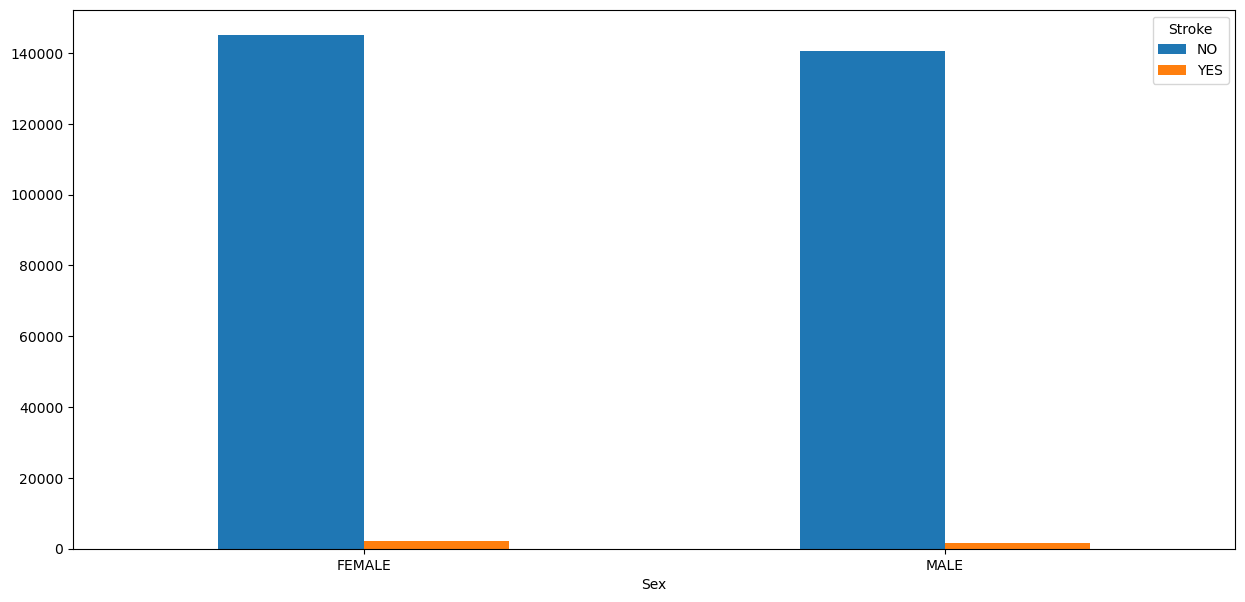

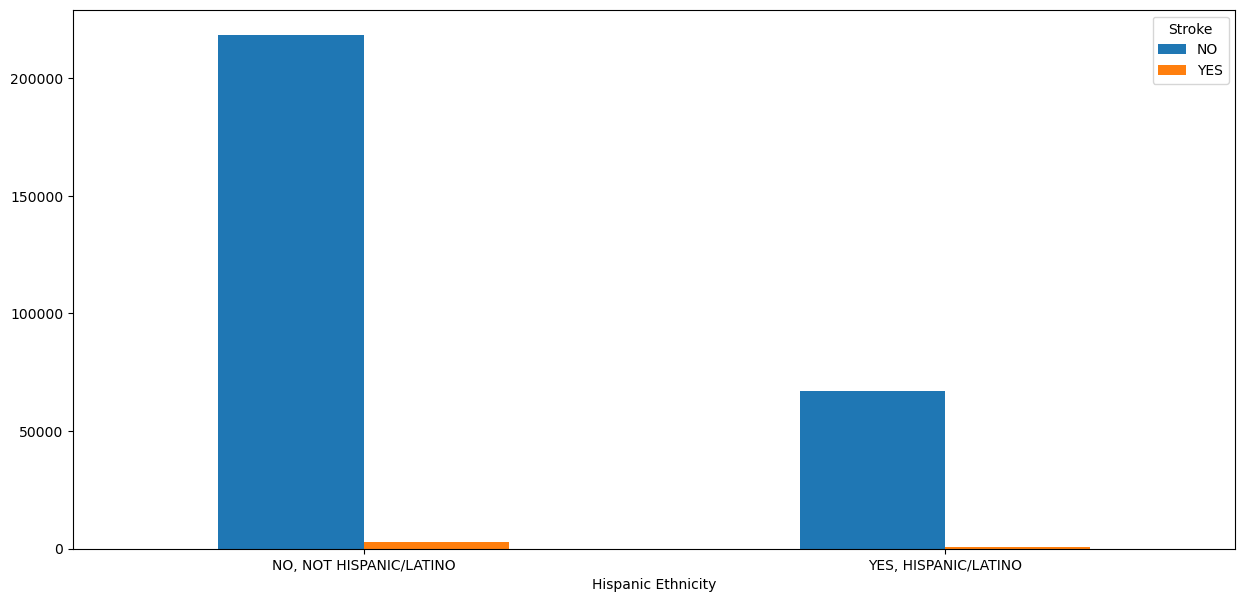

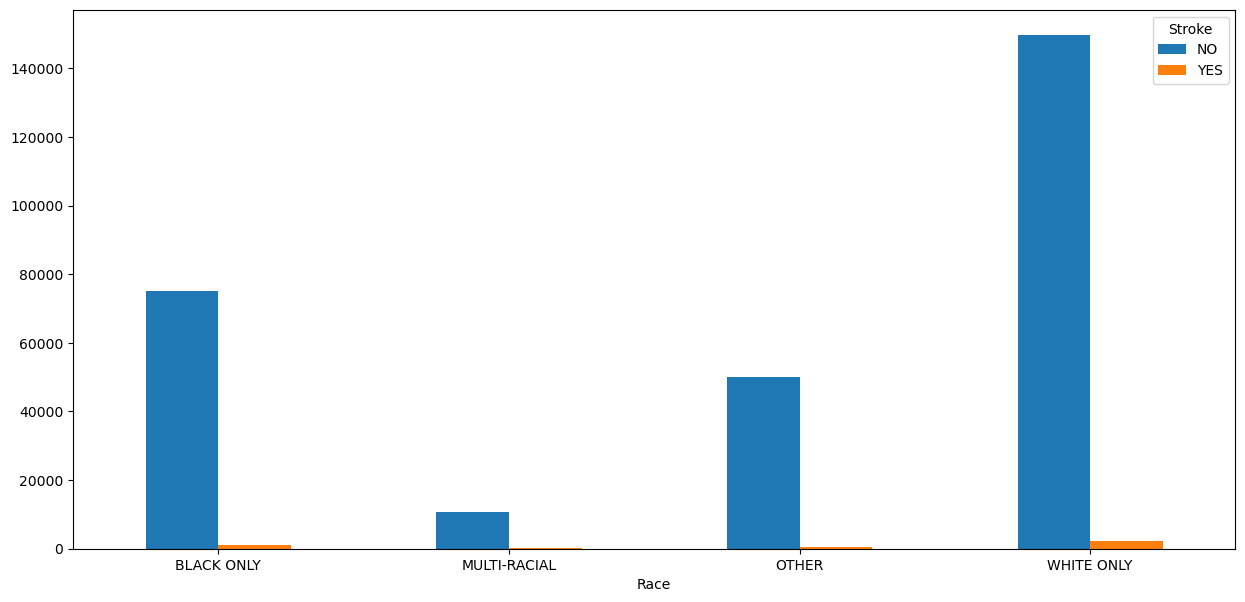

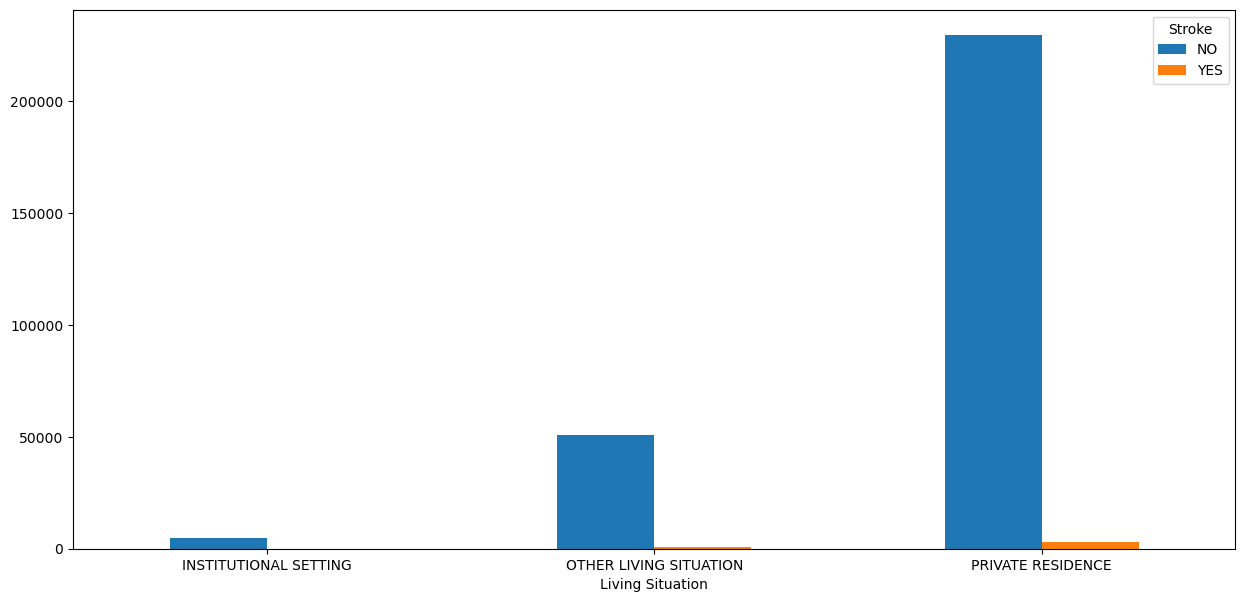

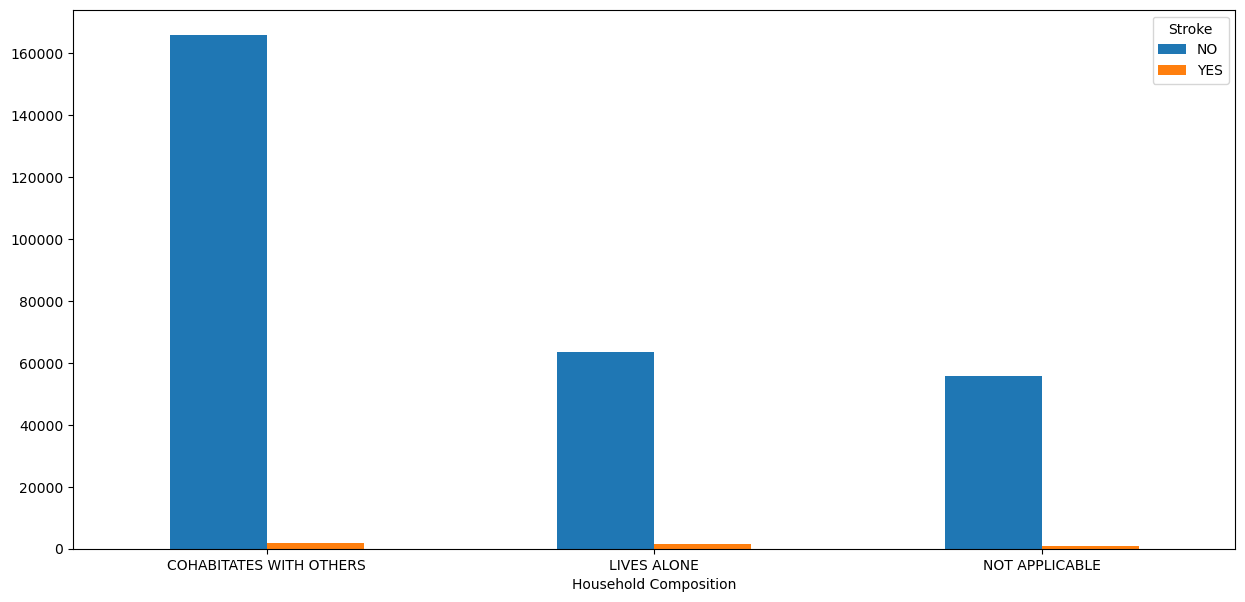

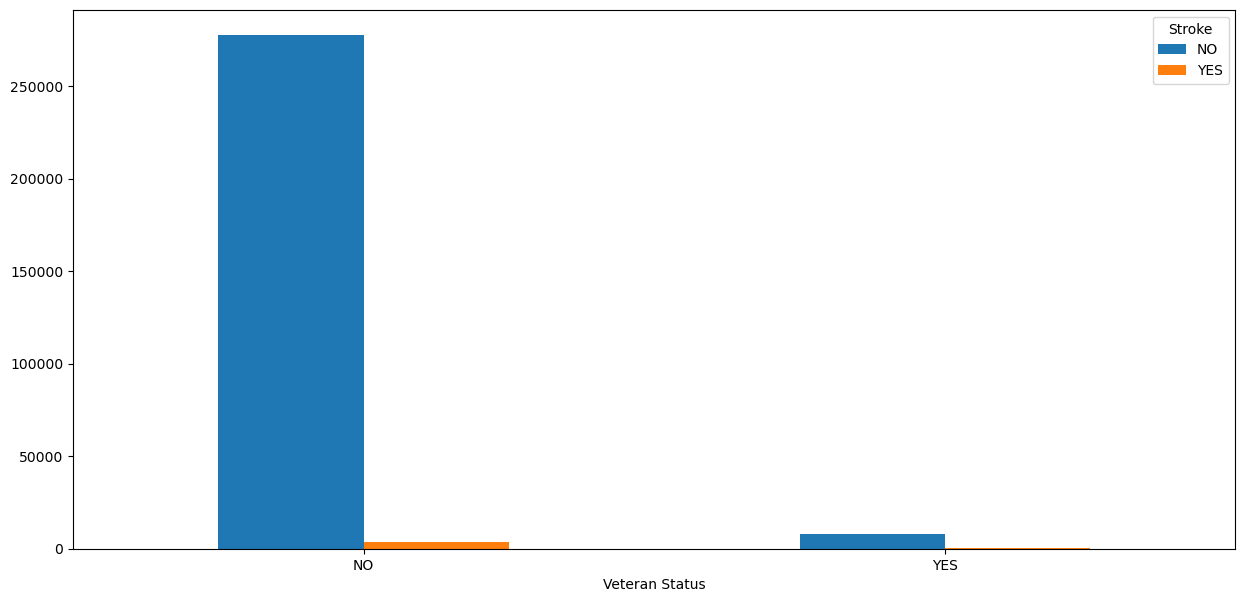

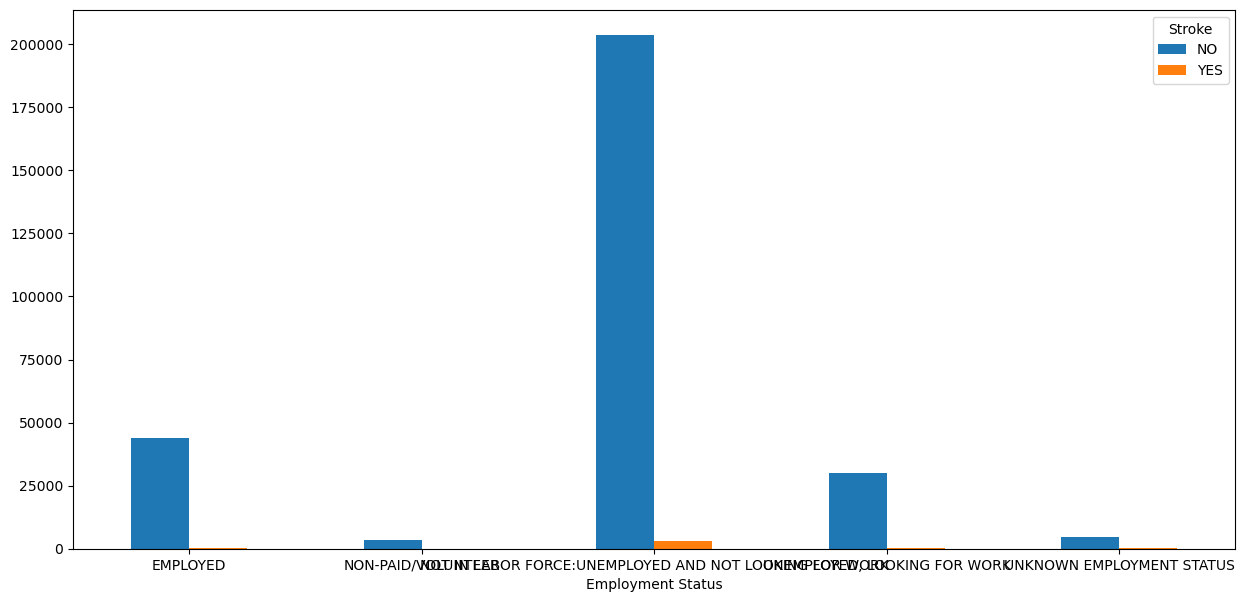

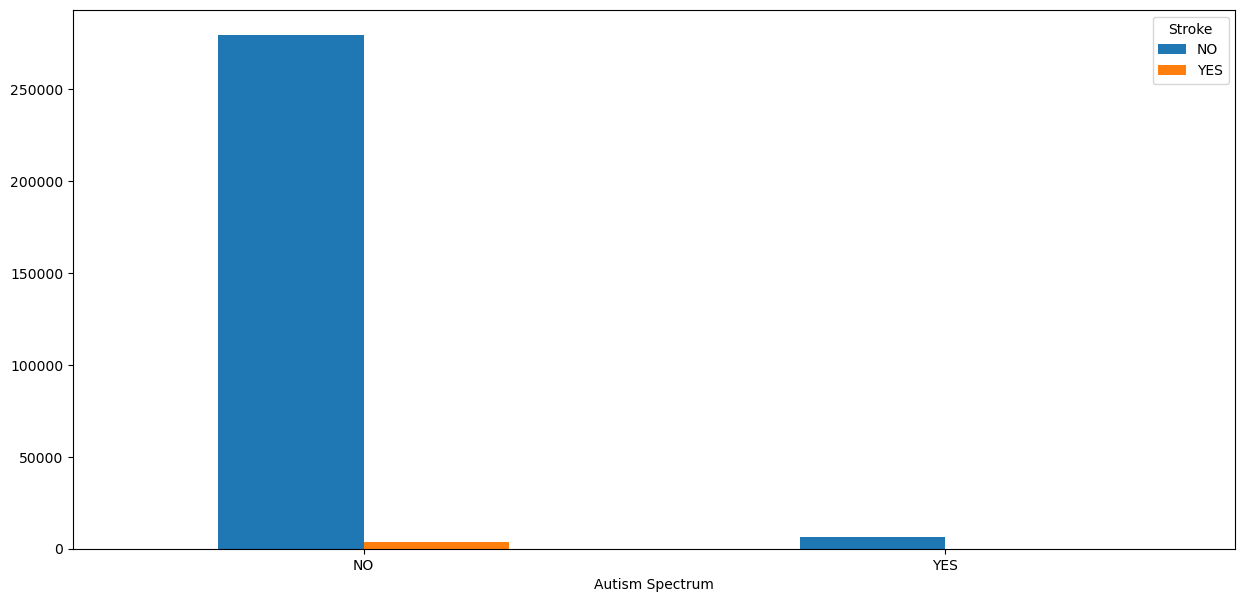

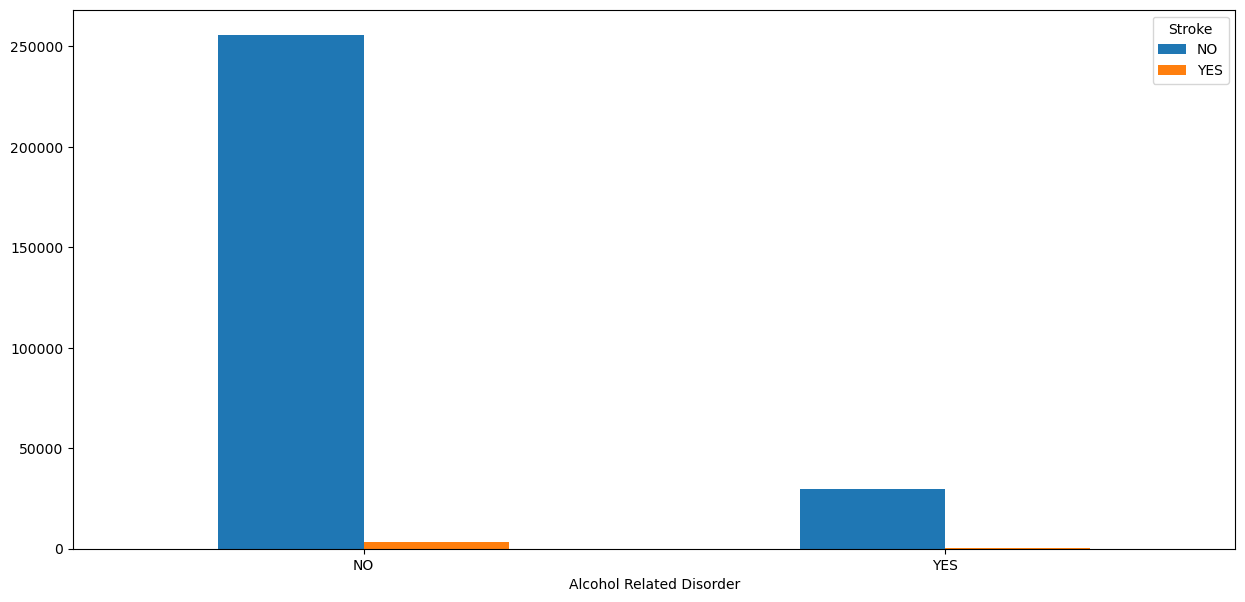

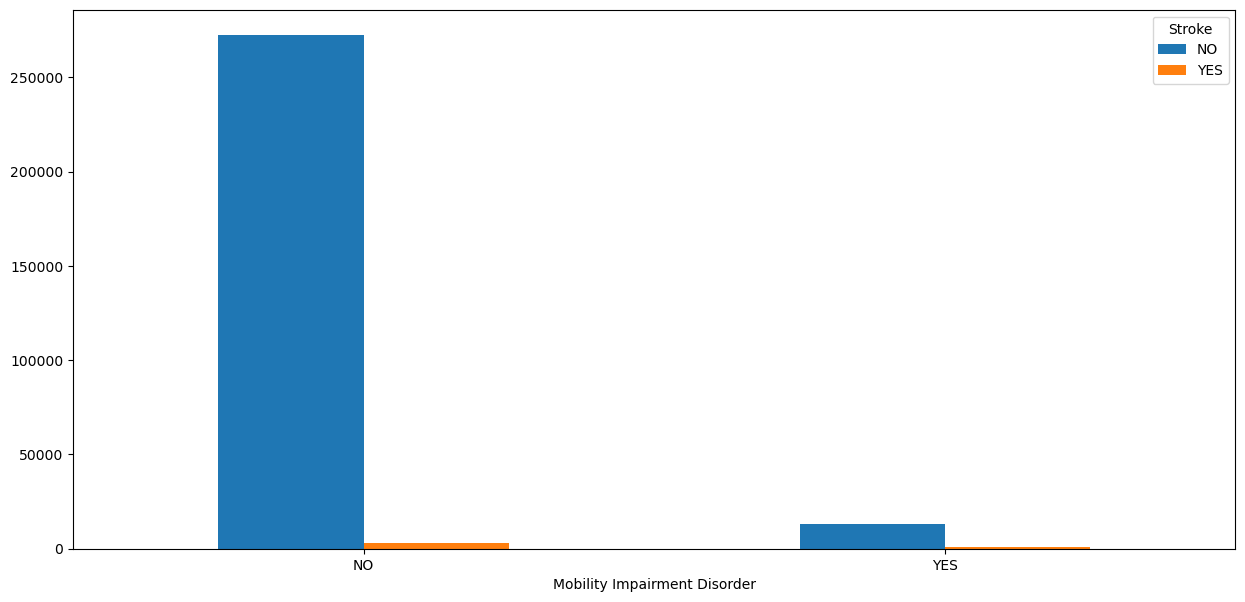

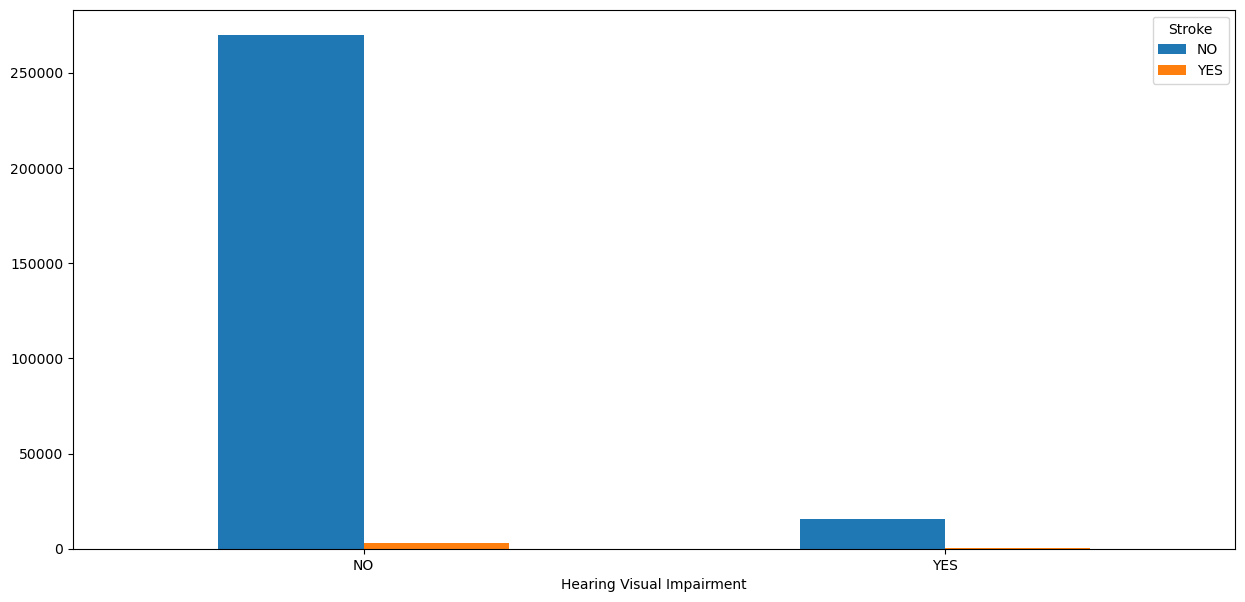

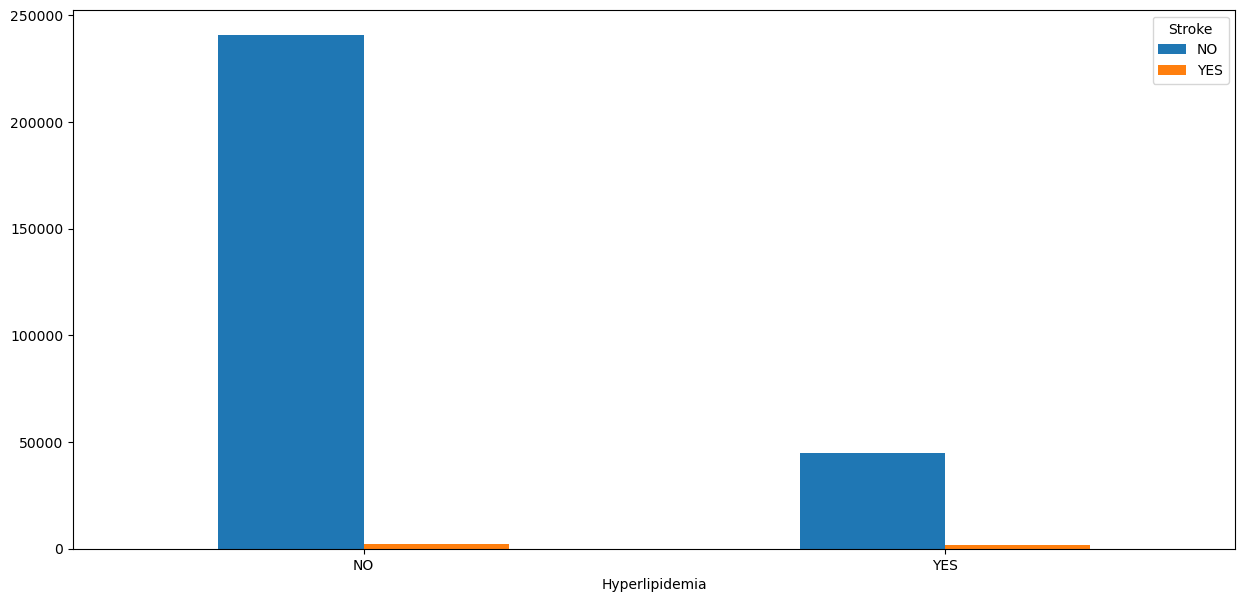

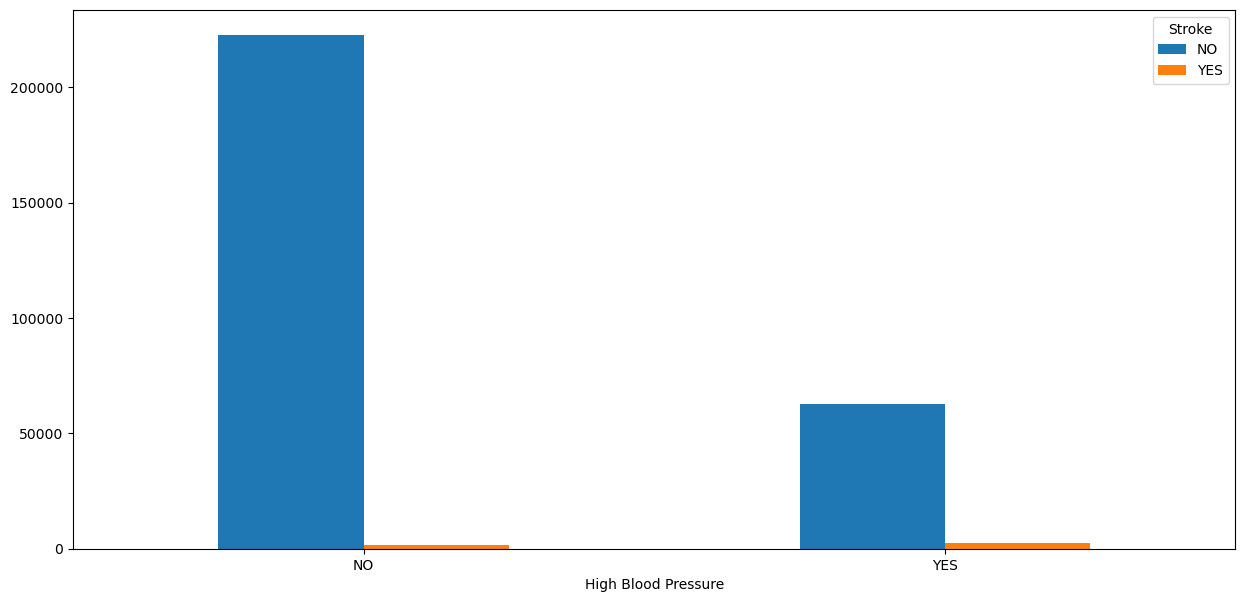

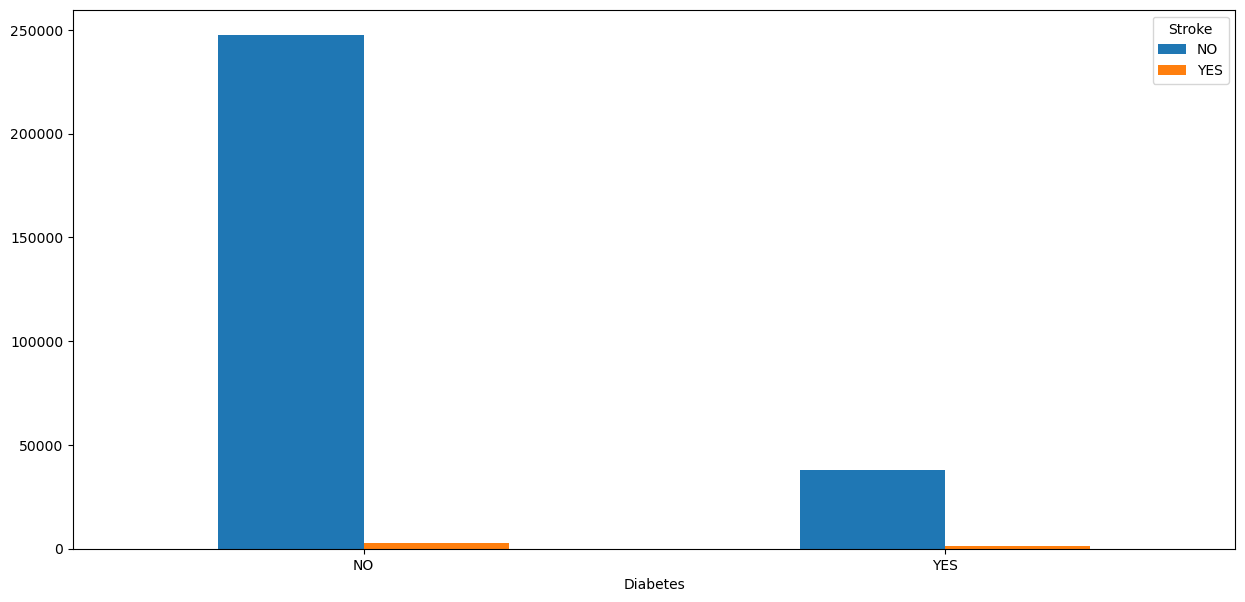

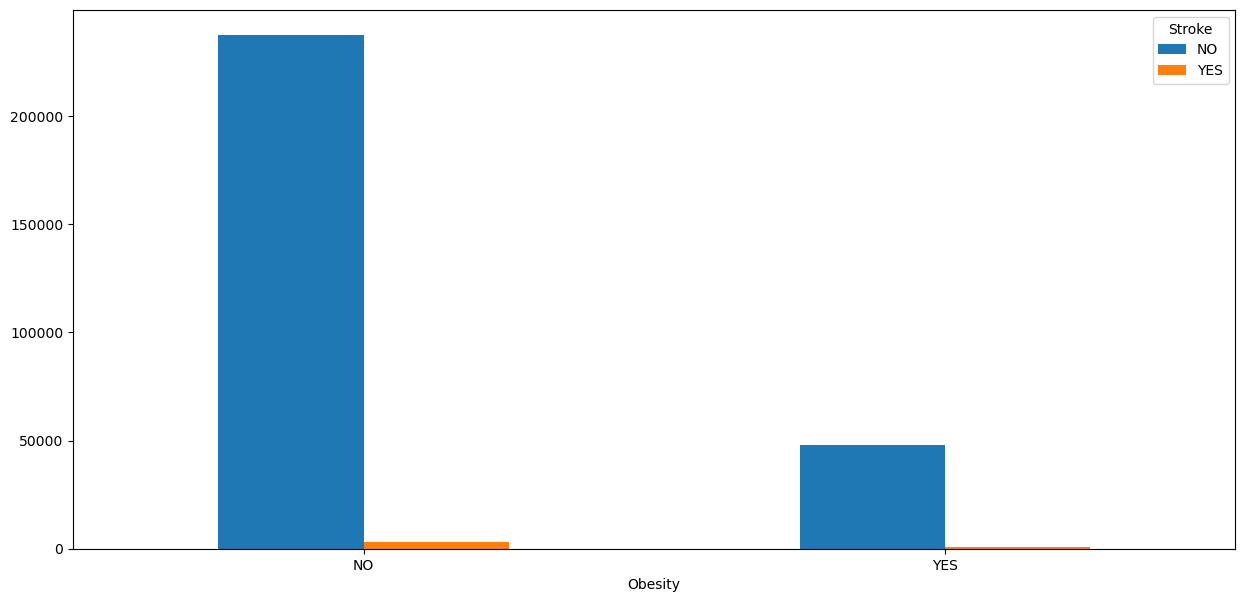

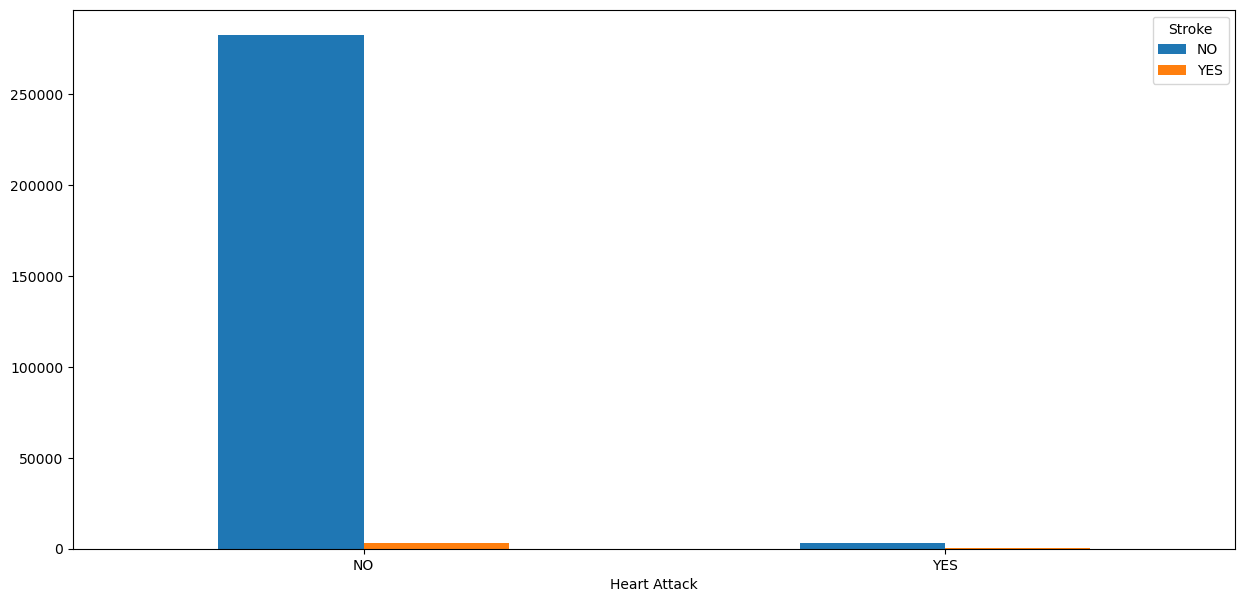

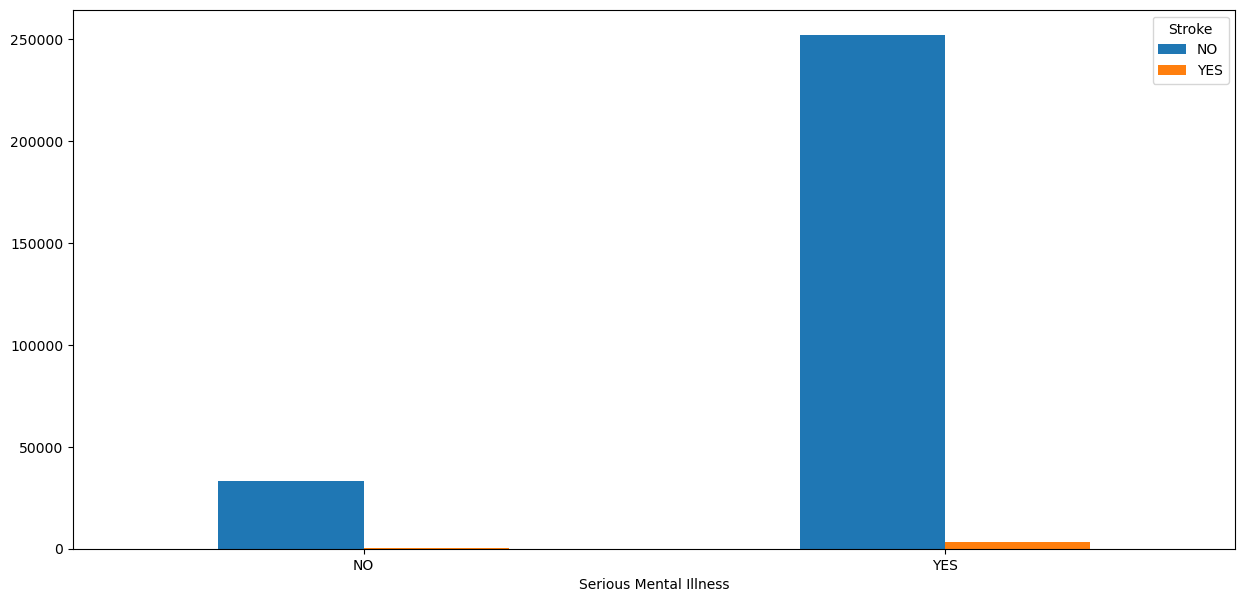

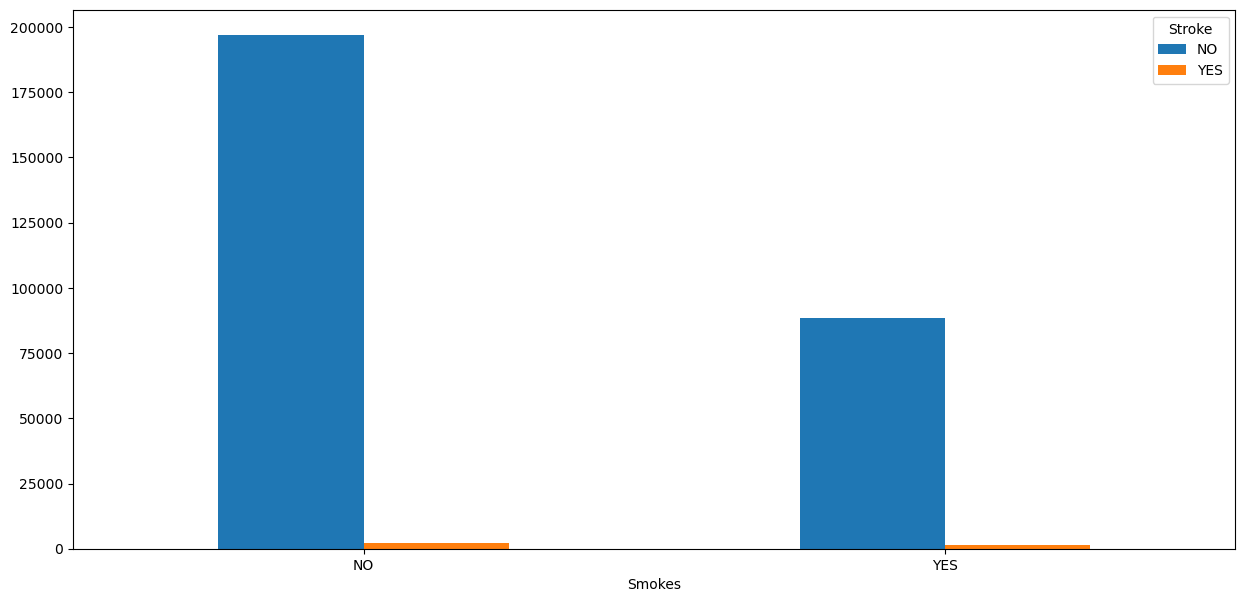

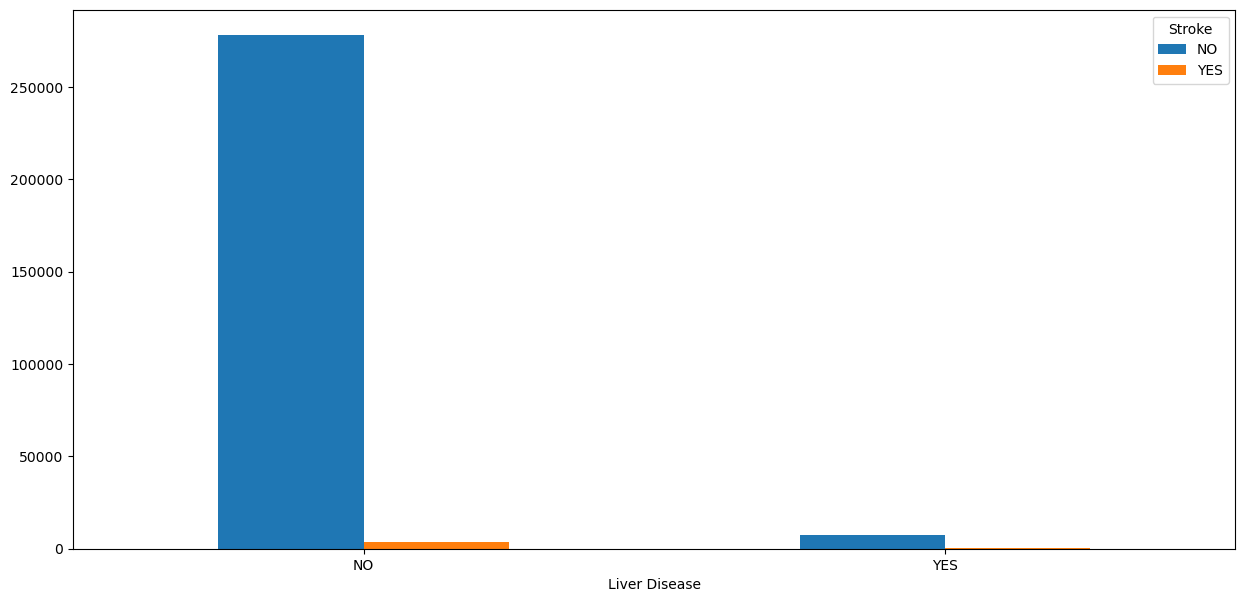

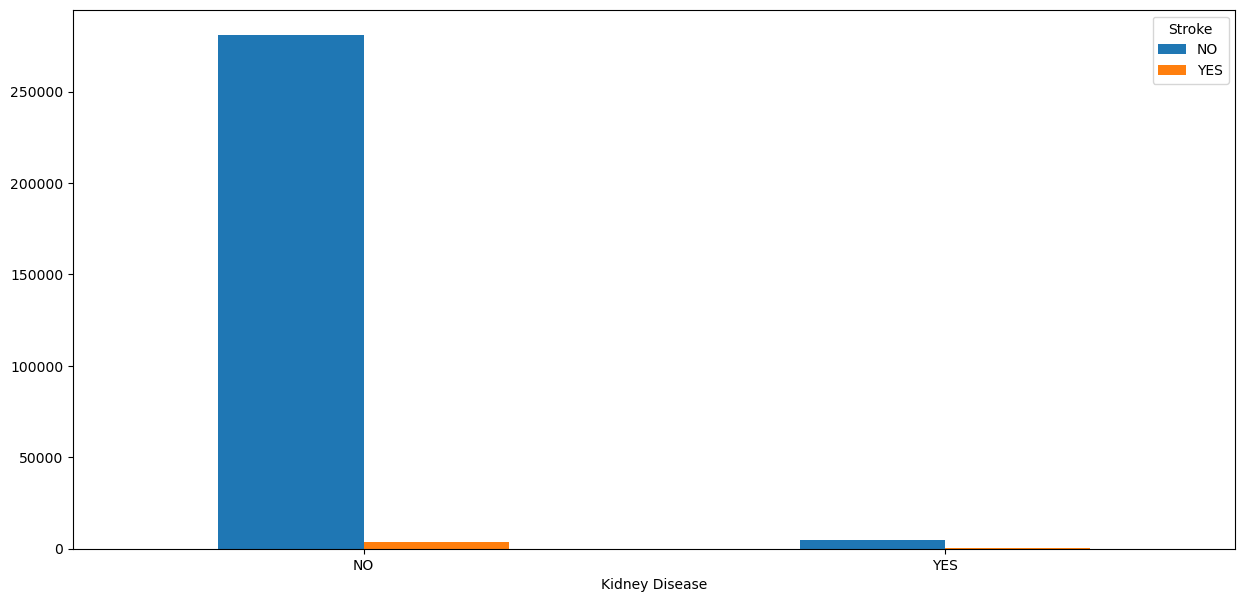

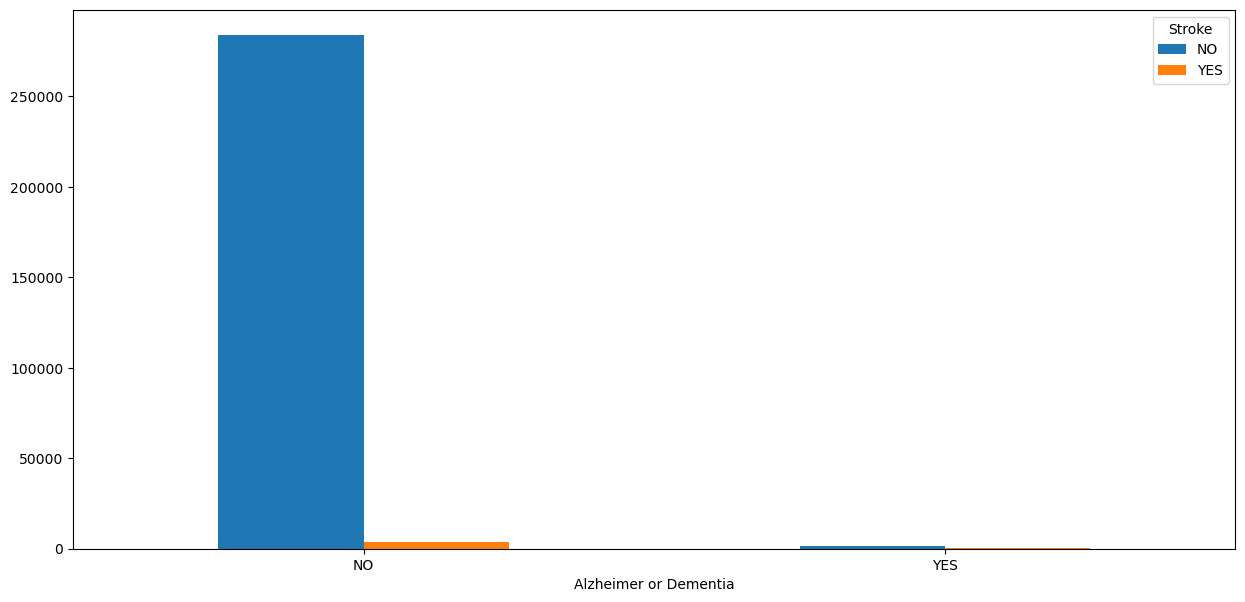

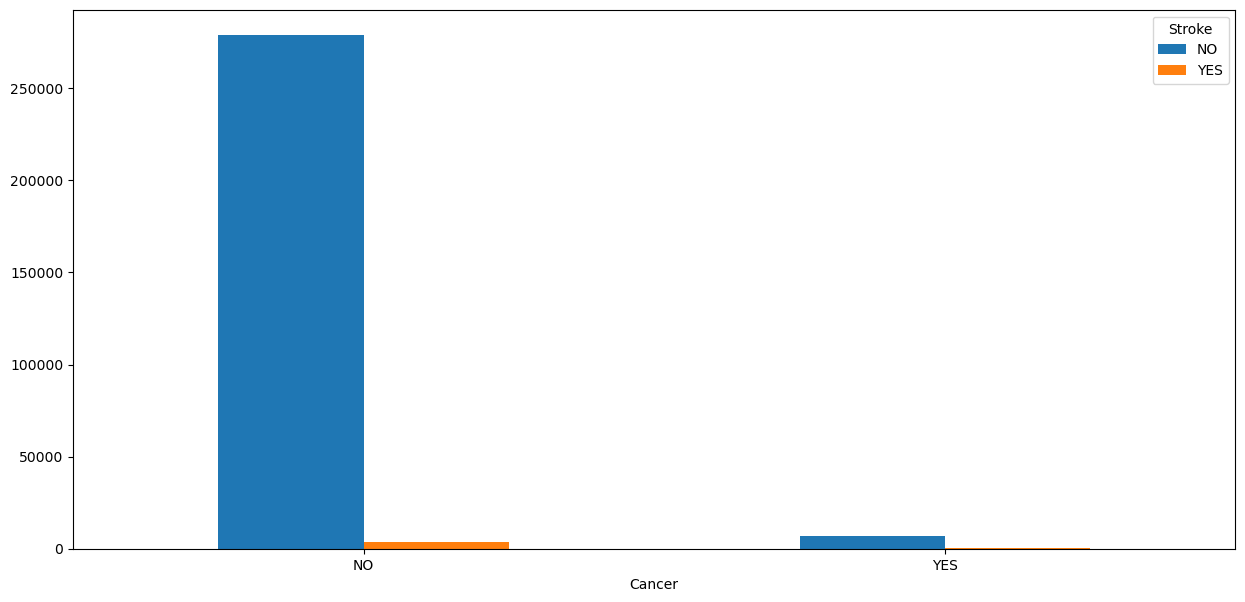

In [19]:

# Cross tabulation between features and Stroke
for i in b:
    CrosstabResult=pd.crosstab(index=df[i],columns=df['Stroke'])
    
# Grouped bar chart between features and Stroke
    CrosstabResult.plot.bar(figsize=(15,7), rot=0)

In [20]:
for j in df.columns.values.tolist() :
    le = LabelEncoder()
    df[j] = le.fit_transform(df[j])
df

,Age Group,Sex,Hispanic Ethnicity,Race,Living Situation,Household Composition,Veteran Status,Employment Status,Autism Spectrum,Alcohol Related Disorder,...,Diabetes,Obesity,Heart Attack,Serious Mental Illness,Smokes,Liver Disease,Kidney Disease,Alzheimer or Dementia,Cancer,Stroke
1,0,0,0,2,2,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,3,2,0,0,2,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,0,3,2,0,0,2,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,3,2,0,0,2,0,0,...,0,0,0,1,1,0,0,0,0,0
6,0,1,1,3,2,1,1,2,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367391,0,1,1,0,1,2,0,2,0,1,...,0,0,0,1,1,0,0,0,0,0
367392,0,1,0,0,1,2,0,2,0,0,...,1,1,0,1,1,0,0,0,0,0
367393,0,0,0,0,1,2,0,2,0,0,...,0,0,0,1,1,0,0,0,0,0
367394,0,0,1,1,1,2,0,2,0,0,...,1,1,0,1,0,0,0,0,0,0


In [21]:
for col in df:
    print(df[col].unique())
    print(df[col].value_counts())

[0 1]
0    232653
1     56611
Name: Age Group, dtype: int64
[0 1]
0    147208
1    142056
Name: Sex, dtype: int64
[0 1]
0    221184
1     68080
Name: Hispanic Ethnicity, dtype: int64
[2 3 0 1]
3    151733
0     75984
2     50716
1     10831
Name: Race, dtype: int64
[2 1 0]
2    232605
1     51720
0      4939
Name: Living Situation, dtype: int64
[0 1 2]
0    167578
1     65027
2     56659
Name: Household Composition, dtype: int64
[0 1]
0    280937
1      8327
Name: Veteran Status, dtype: int64
[0 2 3 1 4]
2    206613
0     44152
3     30280
4      4636
1      3583
Name: Employment Status, dtype: int64
[0 1]
0    282835
1      6429
Name: Autism Spectrum, dtype: int64
[0 1]
0    258750
1     30514
Name: Alcohol Related Disorder, dtype: int64
[0 1]
0    275159
1     14105
Name: Mobility Impairment Disorder, dtype: int64
[0 1]
0    272798
1     16466
Name: Hearing Visual Impairment, dtype: int64
[0 1]
0    242930
1     46334
Name: Hyperlipidemia, dtype: int64
[1 0]
0    224040
1     65224
N

In [22]:
# for i in df.columns.values.tolist():
#     plt.figure(figsize=(12,10))
#     sns.distplot(df[df['Stroke'] == 0][i],color='green')
#     sns.distplot(df[df['Stroke'] == 1][i],color='red')

#     plt.title('No Stroke vs Stroke by '+ i +' ',fontsize=15)
#     plt.xlim([-1,5])

In [23]:
# # Cross tabulation between features and Stroke
# for i in b:
#     CrosstabResult=pd.crosstab(index=df[i],columns=df['Stroke'])
    
# # Grouped bar chart between features and Stroke
#     CrosstabResult.plot.bar(figsize=(15,7), rot=0)

<AxesSubplot:>

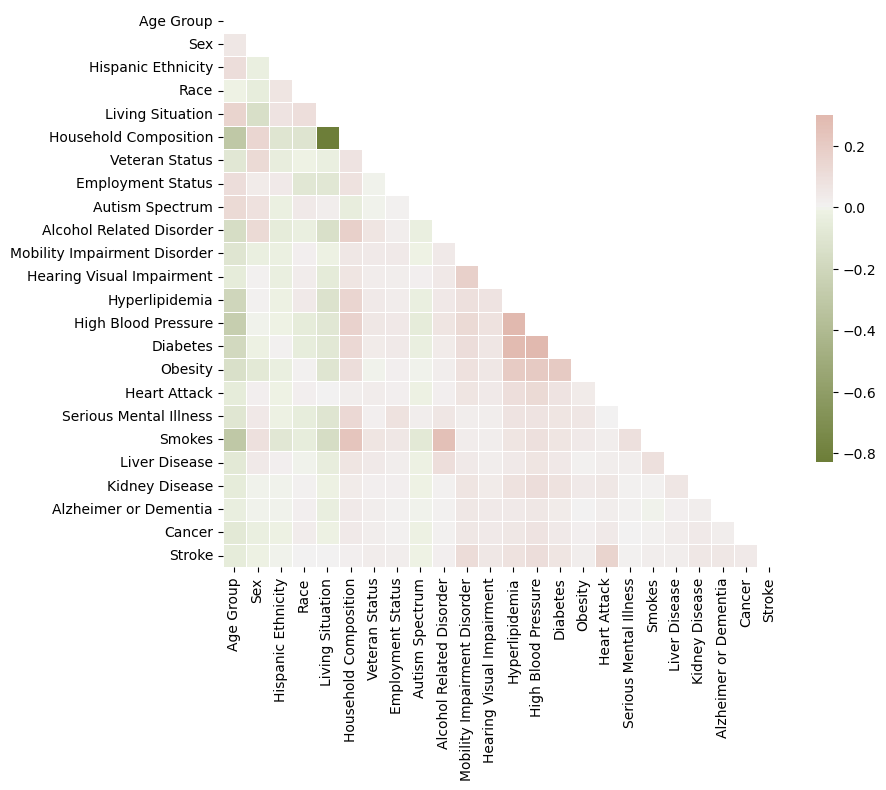

In [24]:
# compute the corr matrix

corr = df.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(9,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(100,20,as_cmap=True)

#draw the heatpmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})

In [25]:
df=df.drop(['Household Composition'], axis=1)

the dataset is highly imbalanced.

Only 3864 strokes are in our dataset which totals 289264 - around 1 in 70.

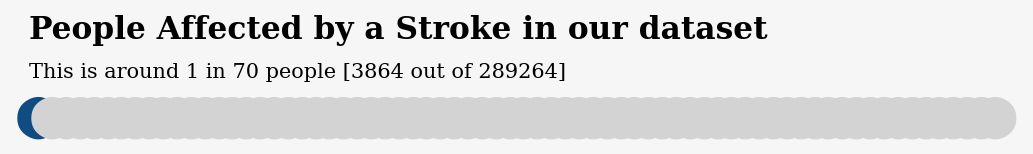

In [26]:
from pywaffle import Waffle
background_color = "#f6f6f6"
fig = plt.figure(figsize=(7, 2),dpi=150,facecolor=background_color,
    FigureClass=Waffle,
    rows=1,
    values=[1, 69],
    colors=['#0f4c81', "lightgray"],
    characters='⬤',
    font_size=20,vertical=True,
)

fig.text(0.035,0.78,'People Affected by a Stroke in our dataset',fontfamily='serif',fontsize=15,fontweight='bold')
fig.text(0.035,0.65,'This is around 1 in 70 people [3864 out of 289264]',fontfamily='serif',fontsize=10)

plt.show()

Modelling

Can we predict whether or not an indiviudal will suffer a stroke?
First, I will use the SMOTE (Synthetic Minority Over-sampling Technique) to balance our dataset.

Currently, as I mentioned above, there are many more negative examples of a stroke and this could hinder our model.

This can be addressed using SMOTE.

Baseline
For such an imbalanced dataset, a useful baseline can be to beat the 'Null Accuracy', and in our case, since we're looking for the positive ('stroke'), I will take the inverse of that. In other words, always predicting the most common outcome.

For this case, 3864/(3864+289264) = 0.0131

So a good target to beat would be 5%~ for recall for positive stroke patients.

In [27]:
# Inverse of Null Accuracy
print('Inverse of Null Accuracy: ',3864/(3864+289264))
print('Null Accuracy: ',289264/(289264+3864))

Inverse of Null Accuracy:  0.013181954640975956
Null Accuracy:  0.9868180453590241


In [28]:
X=df.drop(['Stroke'], axis=1)
y = df['Stroke']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)


In [29]:
X_test.head(2)

,Age Group,Sex,Hispanic Ethnicity,Race,Living Situation,Veteran Status,Employment Status,Autism Spectrum,Alcohol Related Disorder,Mobility Impairment Disorder,...,High Blood Pressure,Diabetes,Obesity,Heart Attack,Serious Mental Illness,Smokes,Liver Disease,Kidney Disease,Alzheimer or Dementia,Cancer
112617,1,0,0,3,2,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
259698,1,0,0,0,2,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
# # Our data is biased, we can fix this with SMOTE
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

Our data is now equal

# Models

I will model Random Forest, SVM, and Logisitc Regression for this classificatioin task.

In addition, I will utilise 10 fold cross validation.

In [31]:
# Models

# Scale our data in pipeline, then split
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
# svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])
# logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])



#X = upsampled_df.iloc[:,:-1] # X_train_resh
#Y = upsampled_df.iloc[:,-1]# y_train_resh

#retain_x = X.sample(100)
#retain_y = Y.loc[X.index]

#X = X.drop(index=retain_x.index)
#Y = Y.drop(index=retain_x.index)

In [32]:
# rf_cv = cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
# svm_cv = cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
# logreg_cv = cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
# print('done')

In [33]:
# print('Mean f1 scores:')
# print('Random Forest mean :',cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
# print('work')
# print('SVM mean :',cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
# print('workwork')
# print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())

In [34]:
print('hi')


hi


Smote

In [35]:
print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Before OverSampling, counts of label 1: 1098
Before OverSampling, counts of label 0: 85681 



In [36]:
# from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
# import imblearn
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (171362, 22)
After OverSampling, the shape of train_y: (171362,)
After OverSampling, counts of label 1: 85681
After OverSampling, counts of label 0: 85681


 Model Selection

In [37]:
models = []
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['BernoulliNB',BernoulliNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])

In [38]:
lst_1 = []
for m in tqdm(range(len(models))):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train_res,y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train_res,y = y_train_res, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

XGBClassifier :
[[145485  54234]
 [  1254   1512]]
Accuracy Score:  0.7259648862878731

K-Fold Validation Mean Accuracy: 78.84 %

Standard Deviation: 0.34 %

ROC AUC Score: 0.64 %

Precision: 0.03 %

Recall: 0.55 %

F1 Score: 0.05 %
----------------------------------------

Logistic Regression :
[[142959  56760]
 [   825   1941]]
Accuracy Score:  0.7156085635973035

K-Fold Validation Mean Accuracy: 72.02 %

Standard Deviation: 0.29 %

ROC AUC Score: 0.71 %

Precision: 0.03 %

Recall: 0.70 %

F1 Score: 0.06 %
----------------------------------------

SVM :
[[136837  62882]
 [  1054   1712]]
Accuracy Score:  0.6842432772797985

K-Fold Validation Mean Accuracy: 77.51 %

Standard Deviation: 0.30 %

ROC AUC Score: 0.65 %

Precision: 0.03 %

Recall: 0.62 %

F1 Score: 0.05 %
----------------------------------------

KNeigbors :
[[148003  51716]
 [  1528   1238]]
Accuracy Score:  0.737047188680643

K-Fold Validation Mean Accuracy: 80.97 %

Standard Deviation: 0.53 %

ROC AUC Score: 0.59 %

Pre

In [39]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2

# COMPARE

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
7,RandomForest,77.429439,84.589939,0.457514,0.539754,0.018525,0.298626,0.034886
6,DecisionTree,76.923229,84.236301,0.403709,0.555727,0.020296,0.336226,0.038282
3,KNeigbors,73.704719,80.967780,0.534372,0.594317,0.023379,0.447578,0.044436
5,BernoulliNB,72.914537,71.256172,0.282136,0.739161,0.036870,0.749458,0.070283
0,XGBClassifier,72.596489,78.838369,0.338740,0.637543,0.027123,0.546638,0.051682
1,Logistic Regression,71.560856,72.015970,0.291362,0.708768,0.033066,0.701735,0.063156
8,AdaBoostClassifier,70.642764,74.476841,0.213480,0.692705,0.031060,0.678597,0.059401
2,SVM,68.424328,77.511353,0.299911,0.652046,0.026504,0.618944,0.050831
4,GaussianNB,40.958096,66.803613,0.388520,0.637597,0.019834,0.872017,0.038786


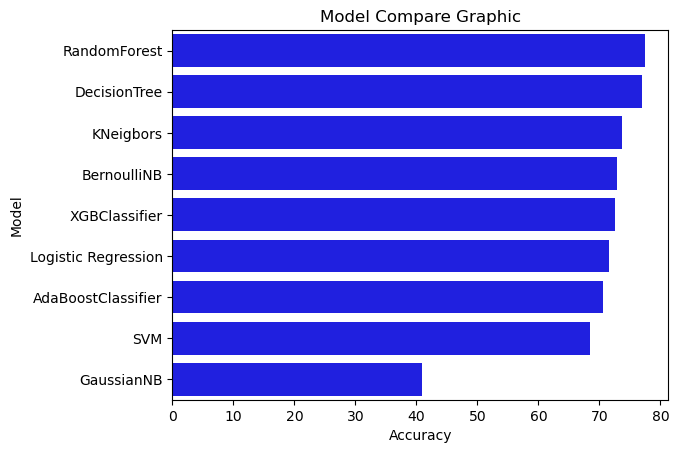

In [40]:
sns.barplot(x='Accuracy',y='Model',data=df2,color='b')
plt.title('Model Compare Graphic');

Model Tuning

In [41]:
grid_models = [(XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}])]

In [42]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train_res,y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
    print('')
    print('-'*25)
    print('')

 XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None): 
 Best Accuracy: 78.84 %

-------------------------

 KNeighborsClassifier(): 
 Best Accuracy: 81.37 %

-------------------------

 DecisionTreeClassifier(): 
 Best Accuracy: 84.24 %

-------------------------

 RandomForestClassifier(): 
 Best Accuracy: 84.60 %

-------------------------



              precision    recall  f1-score   support

           0       0.99      0.73      0.84    199719
           1       0.03      0.55      0.05      2766

    accuracy                           0.73    202485
   macro avg       0.51      0.64      0.45    202485
weighted avg       0.98      0.73      0.83    202485

ROC AUC score: 0.7081892656796682
Accuracy Score:  0.7259648862878731


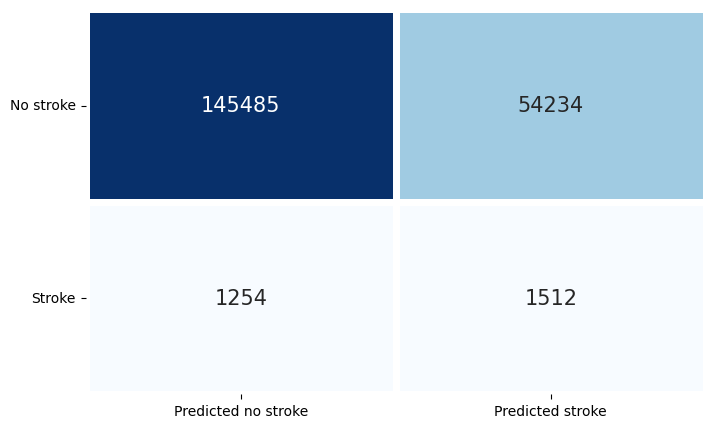

Text(0.5, 0, 'False Positive Rate')

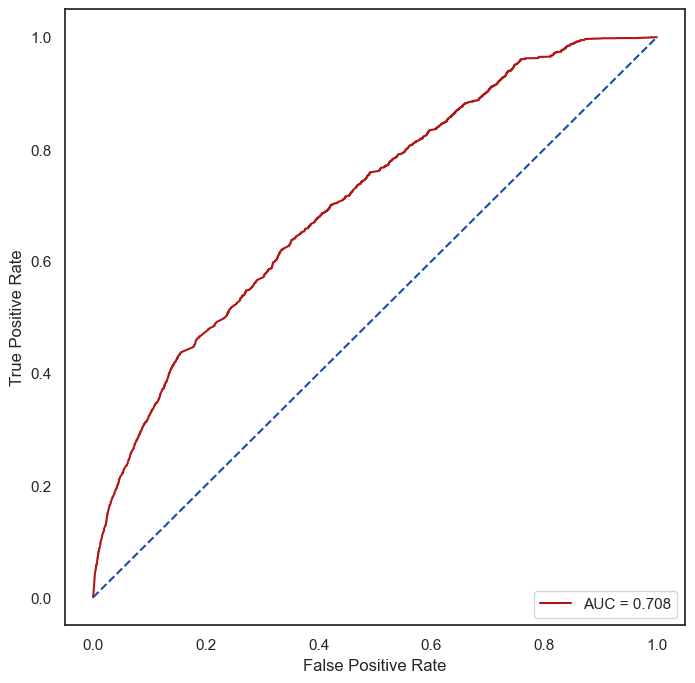

In [43]:
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(X_train_res, y_train_res)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# tuning random forest with 
## With RandomizedSearchCV

In [49]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [50]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Specify the range of values for some important hyperparameters



In [51]:
n_estimators_list = list(range(10,220,50))
criterion_list = ['gini', 'entropy']
max_depth_list = list(range(5,41,10))
max_depth_list.append(None)
min_samples_split_list = [x/1000 for x in list(range(5, 41, 10))]
min_samples_leaf_list = [x/1000 for x in list(range(5, 41, 10))]
max_features_list = ['sqrt', 'log2']

params_grid = {
    'n_estimators': n_estimators_list,
    'criterion': criterion_list,
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list,
    'max_features': max_features_list
}

num_combinations = 1
for k in params_grid.keys(): num_combinations *= len(params_grid[k])

print('Number of combinations = ', num_combinations)
params_grid

Number of combinations =  1600


{'n_estimators': [10, 60, 110, 160, 210],
 'criterion': ['gini', 'entropy'],
 'max_depth': [5, 15, 25, 35, None],
 'min_samples_split': [0.005, 0.015, 0.025, 0.035],
 'min_samples_leaf': [0.005, 0.015, 0.025, 0.035],
 'max_features': ['sqrt', 'log2']}

In [61]:
def my_roc_auc_score(model, X, y): return metrics.roc_auc_score(y, model.predict(X))

model_rf = RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                              param_distributions=params_grid,
                              n_iter=10,
                              cv=3,
                              scoring=my_roc_auc_score,
                              return_train_score=True,
                              verbose=2)

model_rf.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.015, min_samples_split=0.025, n_estimators=10; total time=   0.2s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.015, min_samples_split=0.025, n_estimators=10; total time=   0.2s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=0.015, min_samples_split=0.025, n_estimators=10; total time=   0.1s
[CV] END criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=0.005, min_samples_split=0.025, n_estimators=60; total time=   1.5s
[CV] END criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=0.005, min_samples_split=0.025, n_estimators=60; total time=   1.5s
[CV] END criterion=entropy, max_depth=25, max_features=log2, min_samples_leaf=0.005, min_samples_split=0.025, n_estimators=60; total time=   1.4s
[CV] END criterion=entropy, max_depth=35, max_features=sq

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 15, 25, 35, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [0.005, 0.015,
                                                             0.025, 0.035],
                                        'min_samples_split': [0.005, 0.015,
                                                              0.025, 0.035],
                                        'n_estimators': [10, 60, 110, 160,
                                                         210]},
                   return_train_score=True,
                   scoring=<function my_roc_auc_score at 0x000002868750FF70>,
                   verbose=2)

In [62]:
model_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 0.025,
 'min_samples_leaf': 0.005,
 'max_features': 'log2',
 'max_depth': 25,
 'criterion': 'entropy'}

In [67]:
# df_cv_results = pd.DataFrame(model_rf.cv_results_)
# df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
#                            'param_n_estimators', 'param_min_samples_split','param_min_samples_leaf',
#                            'param_max_features', 'param_max_depth','param_criterion']]
# df_cv_results.sort_values('rank_test_score', inplace=True)
# df_cv_results[:20]

Step4: Create the final model and evaluate the performance


              precision    recall  f1-score   support

           0       1.00      0.70      0.82    199719
           1       0.03      0.78      0.07      2766

    accuracy                           0.70    202485
   macro avg       0.52      0.74      0.44    202485
weighted avg       0.98      0.70      0.81    202485

ROC AUC score: 0.8098324458228235
Accuracy Score:  0.697636861989777


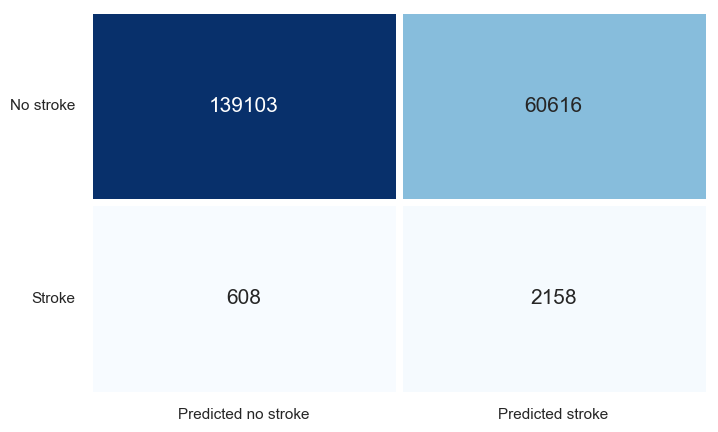

Text(0.5, 0, 'False Positive Rate')

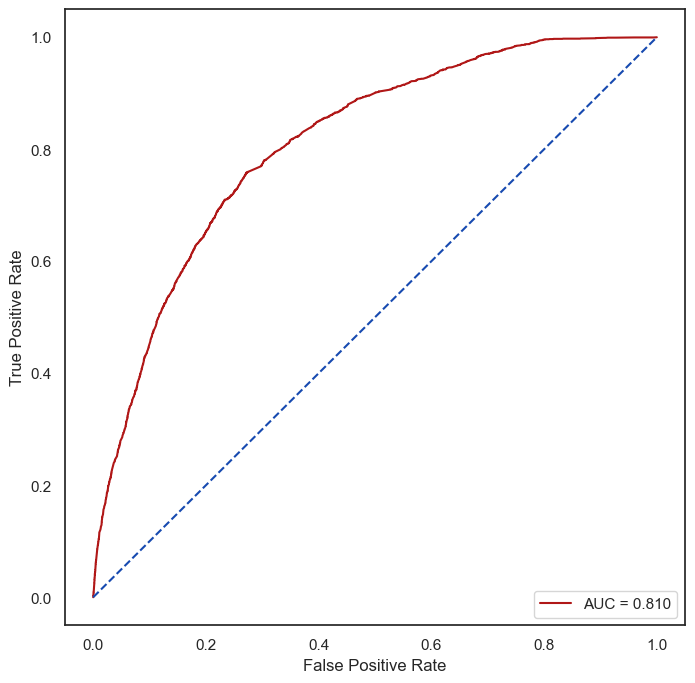

In [63]:
model_rf_fin = RandomForestClassifier(class_weight='balanced',
                                      criterion='entropy',
                                      max_depth=25,
                                      max_features='log2',
                                      min_samples_leaf=0.005,
                                      min_samples_split=0.025,
                                      n_estimators=60)

model_rf_fin.fit(X_train_res, y_train_res)
y_pred = model_rf_fin.predict(X_test)
y_prob = model_rf_fin.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [66]:
from sklearn import metrics
print('AUC Score = {:.4f}'.format(metrics.roc_auc_score(y, model_rf_fin.predict(X))))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')

AUC Score = 0.7412
ROC AUC score: 0.8098324458228235
